In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import math
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from collections import deque

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Estrutura


In [ ]:
class Graph:

    def __init__(self):
        self.vertices = []
        self.graph = {}
        self.cor = {}



    def addVertice(self, v):
      if v not in self.vertices:
        self.vertices.append(v)
        self.graph[v] = []


    def addEdge(self,u,v):
      if u not in self.vertices:
        self.addVertice(u)
        self.graph[u].append(v)
      else:
        self.graph[u].append(v)

      if v not in self.vertices:
        self.addVertice(v)
        self.graph[v].append(u)
      else:
        self.graph[v].append(u)

    #===============================================
    # [([1,2],2),([3,4],2)]
    listaDePesos = []
    def addEdgeWeight(self, vertice1, vertice2, peso):
        if vertice2 in self.graph[vertice1]:
            self.graph[vertice1][vertice2]['peso'] = peso
            listaDePesos.append(f"{vertice1} - {vertice2}", peso)

    #===============================================
    def rmvEdge(self, u, v):
        for index, key in enumerate(self.graph[u]):
            if key == v:
                self.graph[u].pop(index)
        for index, key in enumerate(self.graph[v]):
            if key == u:
                self.graph[v].pop(index)

    def degree(self, v):
        return len(self.graph[v])
    #===============================================
    #Iniciar cor para saber se o vertice foi visitado ou nao
    colors = {
        "branco":0,#nao foi visitado
        "cinza":1,#foi visitado, mas nao foi explorado
        "preto":2 #foi totalmente explorado
    }
    #Inicar  a cor em cada vertice
    def iniciarCor(self):
        for vertices in self.vertices:
            self.cor[vertices] = self.colors["branco"]

    #===============================================
    def getGraphValores(self):
        for vertices in self.vertices:
            print(f"{vertices} : {self.graph.get(vertices)}")

    def getVertices(self): # apresenta os vertices
        return self.vertices
    def getGraph(self): # apresenta como um DICT o grafo
        return self.graph

    def showEdge(self):
        for vertice in self.graph:
            for vizinho in self.graph[vertice]:
                print("Edge : ", vertice, " - ", vizinho)

    def vertice_inicial(self):
        for node in graph.vertices:
            if node.degree % 2 != 0: #se for é semi
                return node
        return 0 #nesse caso é euleriano

    def bfs(self, no_inical):
      fila = []
      visitados = []
      self.iniciarCor()

      fila.append(no_inical)
      while fila:
        for adj in self.getGraph()[fila[0]]:
          if adj not in visitados and adj not in fila:
            fila.append(adj)
        visitados.append(fila.pop(0))
      return visitados


    def spanningTree(self, no_inicial):

        fila = []
        visitados = []

        subGraph = Graph()
        fila.append(no_inicial)
        while fila:
          # fila[0]
            for adj in self.getGraph()[fila[0]]:
              if adj not in visitados and adj not in fila:
                fila.append(adj)
                subGraph.addEdge(fila[0],adj)
            visitados.append(fila.pop(0))
        return subGraph.getGraph()







In [ ]:
def vertice_inicial(self):
    for node in self.vertices:
        if node.degree % 2 != 0: #se for é semi
            return node
    return 0 #nesse caso é euleriano

In [ ]:
def teorema_Euler(graph):
    num_impares = 0
    for node in graph.vertices:
        if graph.degree(node) % 2 != 0:
            num_impares += 1
    if num_impares == 0:
        return print('Pelo teorema de Euler é Euleriano')
    elif num_impares == 2:
        return print('Pelo teorema de Euler é Semi-Euleriano')
    else:
        return print('Pelo teorema de Euler não é Euleriano')

In [ ]:
def dfs(grafo1, no_atual):
    #no_atual = 1
        for no1, no2 in list(grafo1.getGraph()[no_atual]):
            if grafo1[no1][no2]['label'] == False:
                grafo1[no1][no2]['label'] = True
                no_atual = no2
                print("aresta: ", no1, no2)
                dfs(grafo1, no2)

# ======================================= ERRADO

In [ ]:
def dfs2(grafo, no_inicial):
  fila = []
  visitados = []

  subGraph = Graph()
  fila.append(no_inicial)
  while fila:
  # fila[0]
    for adj in grafo.getGraph()[fila[0]]:
      if adj not in visitados and adj not in fila:
        fila.append(adj)
        subGraph.addEdge(fila[0],adj)
    visitados.append(fila.pop(0))
  return subGraph.getGraph()

In [ ]:
def dfsStack(grafo,no_inicial):
  stack = []
  visitados = []
  subGraph = Graph()
  num = 0
  stack.append(no_inicial)

  while stack:

    for adj in grafo.getGraph()[stack[0]]:
      print(stack[0])
      if stack[0] not in visitados:
        if adj not in visitados:
          stack.append(adj)
          subGraph.addEdge(stack[0],adj)
          visitados.insert(0,stack.pop(0))
          break

        elif adj in visitados:
          stack.pop(0)
          break
      elif stack[0] in visitados:
        break
      # elif adj in visitados:


      # elif adj in visitados:
      #   print(adj)
      #   continue
    stack.append(visitados[num])
    visitados.insert(0,stack.pop(0))
    num+=1
  return subGraph.getGraph()








# Grafos


In [ ]:
dfPe = pd.read_csv('/content/drive/MyDrive/pasta/TrabalhoRede3/grafo1PE.csv')
dfPe

,No1,No2,peso
0,1,2,1
1,1,3,2
2,1,6,3
3,1,7,4
4,2,3,5
5,2,4,6
6,2,6,7
7,3,4,8
8,3,5,9
9,4,5,10


In [ ]:

g1 = Graph()

for col in dfPe.iloc():
  u = col['No1']
  v = col["No2"]
  g1.addEdge(u,v)


g1.getGraph()



{1: [2, 3, 6, 7],
 2: [1, 3, 4, 6],
 3: [1, 2, 4, 5],
 6: [1, 2, 5, 7],
 7: [1, 4, 5, 6],
 4: [2, 3, 5, 7],
 5: [3, 4, 6, 7]}

In [ ]:
display = nx.Graph(g1.getGraph())

In [ ]:
pos = nx.circular_layout(g1.getGraph())




pi = math.pi
for i in pos:
  y = math.cos(2*pi * (i-1)/7)
  x = math.sin(2*pi * (i-1)/7)
  pos[i] = np.array([x,y])

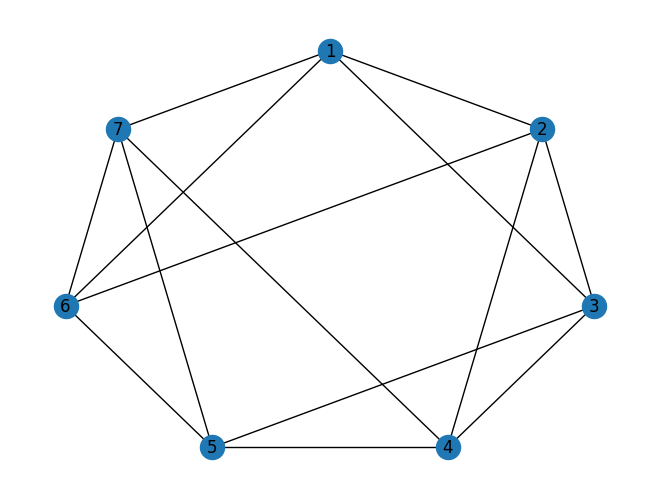

In [ ]:
nx.draw(display, pos, with_labels =True)

In [ ]:
teorema_Euler(g1)

Pelo teorema de Euler é Euleriano


# Trabalho 4


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/pasta/TrabalhoRede3/grafoTrab4.csv')
df4

,No1,No2
0,1,2
1,2,5
2,5,3
3,4,5
4,1,5


In [ ]:
g4 = Graph()

for col in df4.iloc():
  # print(col["No1"])
  u = col["No1"]
  v = col["No2"]
  g4.addEdge(u,v)


g4.getGraph()

{1: [2, 5], 2: [1, 5], 5: [2, 3, 4, 1], 3: [5], 4: [5]}

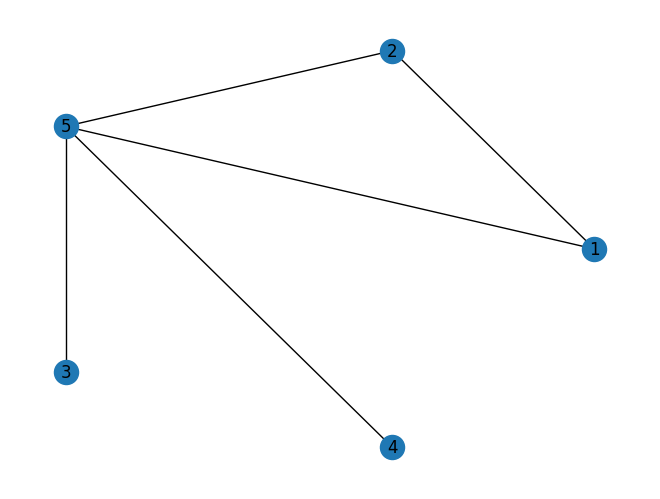

In [ ]:
display = nx.Graph(g4.getGraph())
pos = nx.circular_layout(g4.getGraph())
nx.draw(display,pos, with_labels =True)

In [ ]:
g4.bfs(1)

[1, 2, 5, 3, 4]

In [ ]:
spaTree = g4.spanningTree(3)
spaTree

{3: [5], 5: [3, 2, 4, 1], 2: [5], 4: [5], 1: [5]}

<ipython-input-698-71964b7177ae>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(displayTree4, prog = "dot")


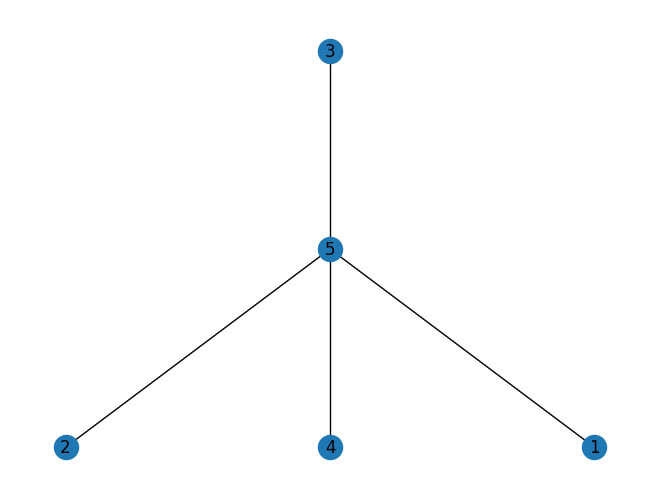

In [ ]:
displayTree4 = nx.Graph(spaTree)
pos = graphviz_layout(displayTree4, prog = "dot")
nx.draw(displayTree4,pos, with_labels =True)

# teste


In [ ]:
gTeste = Graph()

gTeste.addEdge(1,2)
gTeste.addEdge(1,3)
gTeste.addEdge(1,4)
gTeste.addEdge(2,4)
gTeste.addEdge(3,4)
gTeste.addEdge(2,6)
gTeste.addEdge(4,7)
gTeste.addEdge(6,7)
gTeste.addEdge(6,5)
gTeste.addEdge(5,7)


In [ ]:
gTeste.getGraph()

{1: [2, 3, 4],
 2: [1, 4, 6],
 3: [1, 4],
 4: [1, 2, 3, 7],
 6: [2, 7, 5],
 7: [4, 6, 5],
 5: [6, 7]}

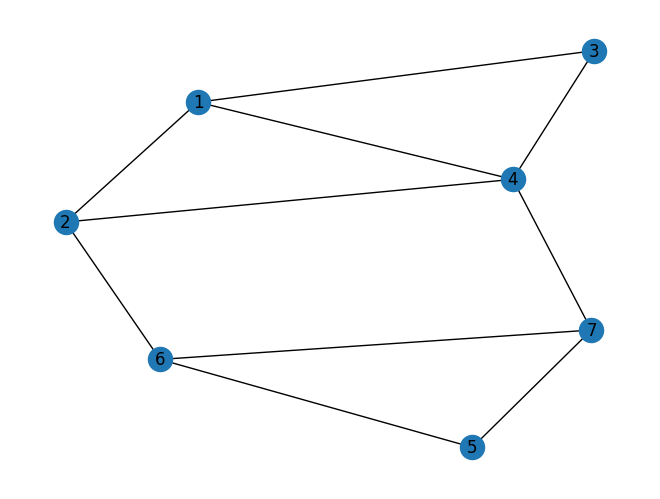

In [ ]:
displayTeste = nx.Graph(gTeste.getGraph())
nx.draw(displayTeste, with_labels =True)

In [ ]:
spaTreeTeste = gTeste.spanningTree(6)
spaTreeTeste

{6: [2, 7, 5], 2: [6, 1, 4], 7: [6], 5: [6], 1: [2, 3], 4: [2], 3: [1]}

<ipython-input-703-5e4fbf10fc8f>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(displayTreeTeste, prog = "dot")


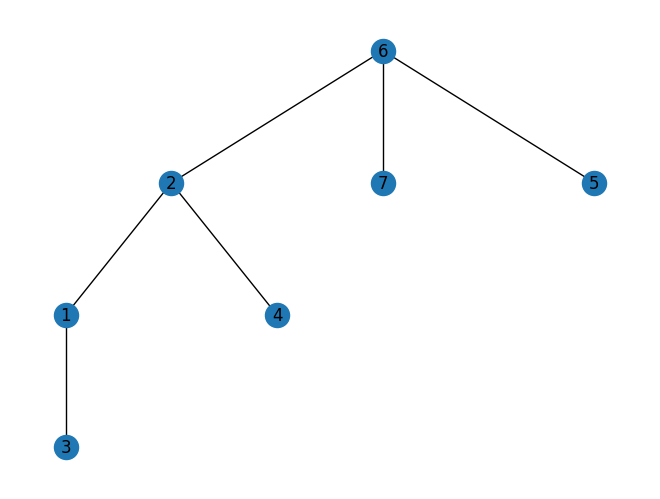

In [ ]:
displayTreeTeste = nx.Graph(spaTreeTeste)
pos = graphviz_layout(displayTreeTeste, prog = "dot")
nx.draw(displayTreeTeste,pos, with_labels =True)

# Trabalho 5


In [ ]:
g5 = Graph()

g5.addEdge(1,3)
g5.addEdge(1,4)
g5.addEdge(3,2)
g5.addEdge(3,4)
g5.addEdge(3,8)
g5.addEdge(2,4)
g5.addEdge(4,7)
g5.addEdge(4,6)
g5.addEdge(6,7)
g5.addEdge(6,5)
g5.addEdge(5,7)


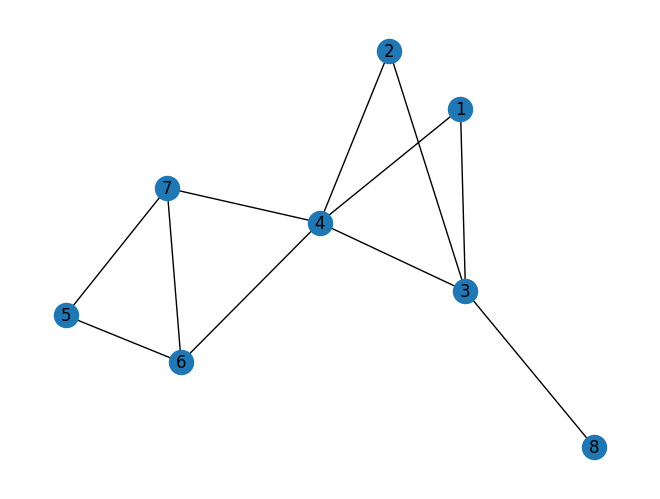

In [ ]:
display = nx.Graph(g5.getGraph())
pos = nx.circular_layout(g5.getGraph())
nx.draw(display, with_labels =True)

In [ ]:
dfsStack(g5,4)

A saída de streaming foi truncada nas últimas 5000 linhas.
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4

KeyboardInterrupt: ignored